# Scoring based on Capital 
Our group found some libraries to generate a .csv-like file listing, by company and date, the URLs in the SEC's archives where the investment portfolio filings are stored as consistently structured text and HTML table data. We will be able to programmatically extract the type and scope of different types of asset manager investment holdings (what companies they invested in, the size and value of each investment). This data can be enriched by processing additional news and social data related to portfolio companies into signals of their social impact and mapping these social impact signals to investment portfolios. Based on this data from investment portfolio filings, we hope to be able to identify and analyze investments made in companies that pursue goals related to social good from all different kinds of industries.

### Initial Imports 

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', 500)


### Preprocessing function

In [4]:
def remove_outlier(df):
    IQR = df.describe()['usd']['75%'] - df.describe()['usd']['25%']
    low_outlier = max(0, df.describe()['usd']['25%'] - 3*IQR)
    high_outlier = df.describe()['usd']['75%'] + 3*IQR 

    print( f'The data point is considered as being an outlier if it is outside of this interval: [ {low_outlier} , {high_outlier}]')

    df_no_outliers = df[df.usd < high_outlier]
    df_out_outliers = df[df.usd > high_outlier]
    return df_no_outliers

### Research Question: How do investment managers rank based on social impact?
#### This question is explored using a 5% sample of 13F investment manager portfolio data and Just Capital Investment Index social impact scores for the top ~800 largest public companies

In [5]:
## load investment data
sec13f_sample_df = pd.read_csv("test_results.csv")
sec13f_sample_df

,Unnamed: 0,investor,date,stock,cusip,usd,putcall,pcent
0,6,"KINGDON CAPITAL MANAGEMENT, L.L.C.",2018-08-14,ALTABA INC,021346101,139738.0,NaN,9.75
1,85,"KINGDON CAPITAL MANAGEMENT, L.L.C.",2018-08-14,SPDR S&P 500 ETF TR,78462F103,56969.0,Put,3.97
2,18,"KINGDON CAPITAL MANAGEMENT, L.L.C.",2018-08-14,CATERPILLAR INC DEL,149123101,47485.0,Call,3.31
3,35,"KINGDON CAPITAL MANAGEMENT, L.L.C.",2018-08-14,DOWDUPONT INC,26078J100,36882.0,NaN,2.57
4,55,"KINGDON CAPITAL MANAGEMENT, L.L.C.",2018-08-14,INVESCO QQQ TR,46090E103,36047.0,Put,2.52
5,79,"KINGDON CAPITAL MANAGEMENT, L.L.C.",2018-08-14,SCHULMAN A INC,808194104,35671.0,NaN,2.49
6,71,"KINGDON CAPITAL MANAGEMENT, L.L.C.",2018-08-14,OASIS PETE INC NEW,674215108,32830.0,NaN,2.29
7,53,"KINGDON CAPITAL MANAGEMENT, L.L.C.",2018-08-14,HERON THERAPEUTICS INC,427746102,31424.0,NaN,2.19
8,34,"KINGDON CAPITAL MANAGEMENT, L.L.C.",2018-08-14,DEVON ENERGY CORP NEW,25179M103,28173.0,NaN,1.97
9,41,"KINGDON CAPITAL MANAGEMENT, L.L.C.",2018-08-14,FLEXION THERAPEUTICS INC,33938J106,28156.0,NaN,1.96


## Analyse the data

In [6]:
gouped_data  = sec13f_sample_df.groupby(['investor']).sum()[['usd','pcent' ]]
gouped_data

,usd,pcent
investor,,
ABNER HERRMAN & BROCK LLC,354643.0,55.31
ACADEMY CAPITAL MANAGEMENT INC/TX,348239.0,86.41
ADIRONDACK TRUST CO,75616.0,53.32
ADVENT INTERNATIONAL CORP/MA,5311123.0,100.00
AEW CAPITAL MANAGEMENT L P,2846890.0,75.85
"AJO, LP",6484470.0,29.91
ALBION FINANCIAL GROUP /UT,403345.0,58.13
AMARILLO NATIONAL BANK,108902.0,56.87
AMERICAN FINANCIAL GROUP INC,372872.0,35.75


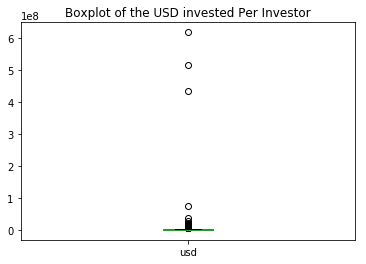

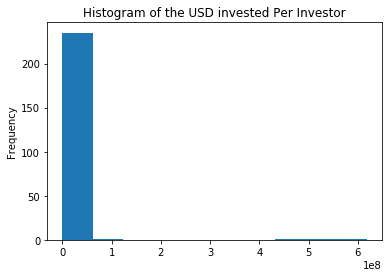

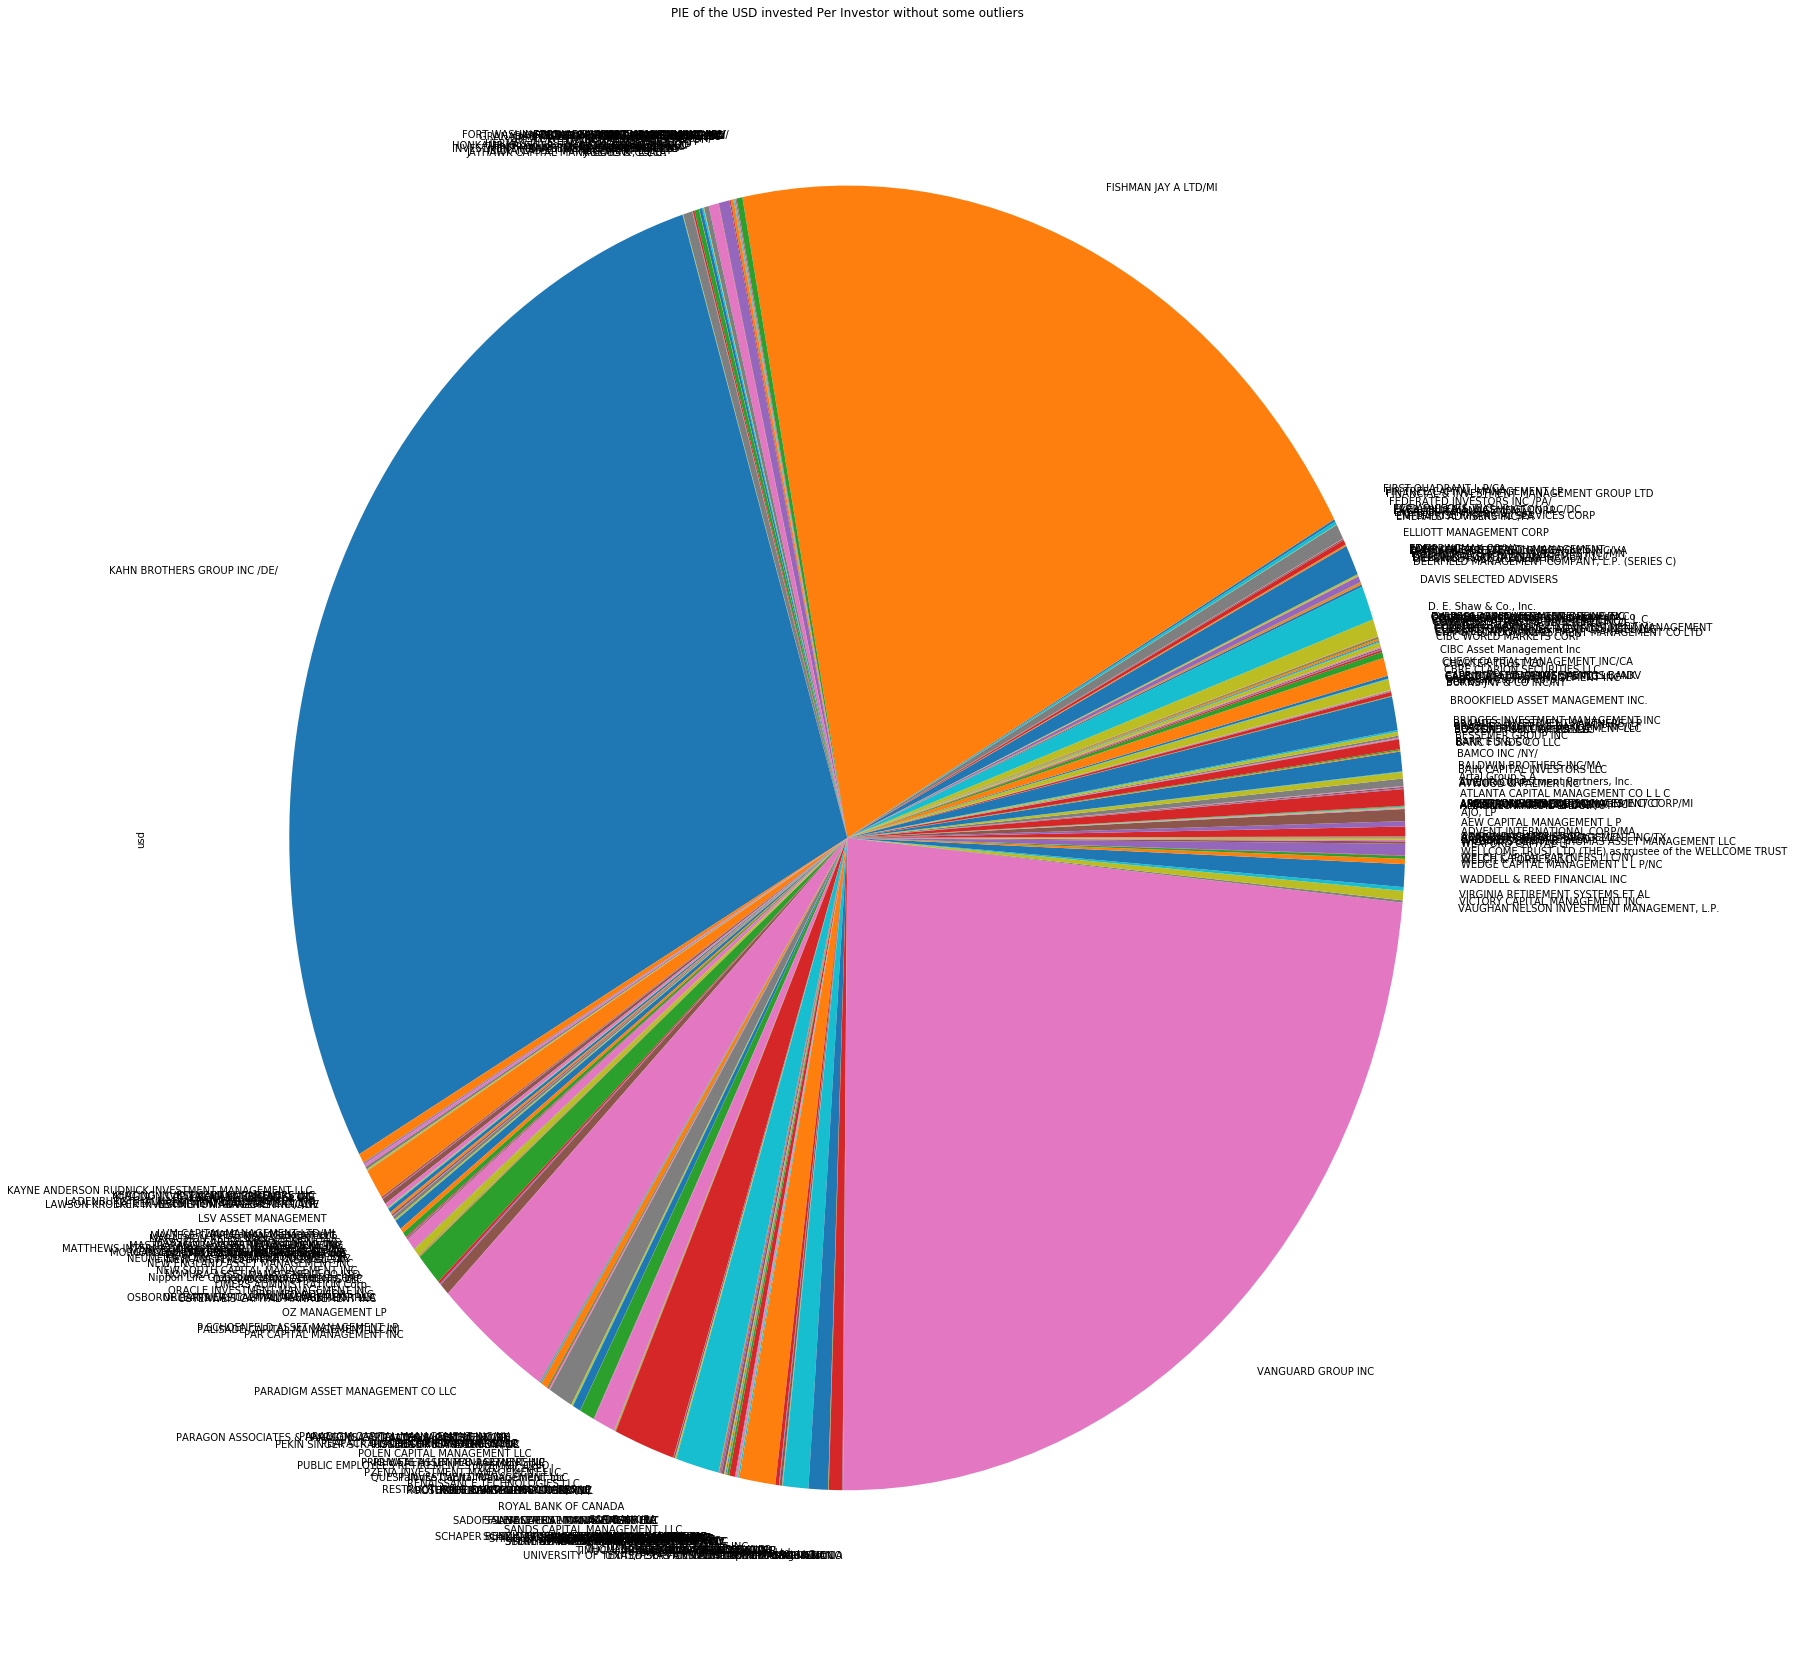

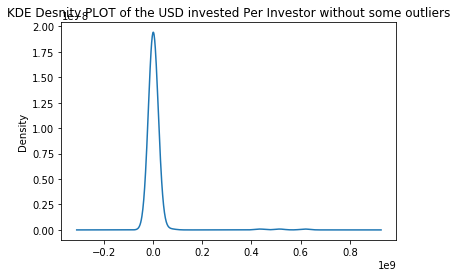

In [7]:
gouped_data['usd'].plot.box()
plt.title('Boxplot of the USD invested Per Investor')
plt.show()
gouped_data['usd'].plot.hist()
plt.title('Histogram of the USD invested Per Investor')
plt.show()
plt.figure(figsize=(25,30))
gouped_data['usd'].plot.pie()
plt.title('PIE of the USD invested Per Investor without some outliers')
plt.show()
gouped_data['usd'].plot.kde()
plt.title('KDE Desnity PLOT of the USD invested Per Investor without some outliers')
plt.show()

The data point is considered as being an outlier if it is outside of this interval: [ 0 , 7623555.5]


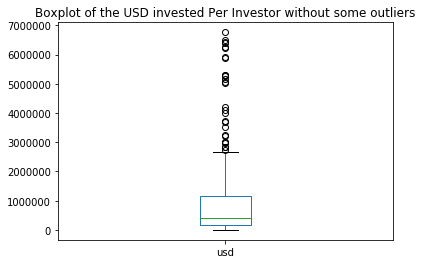

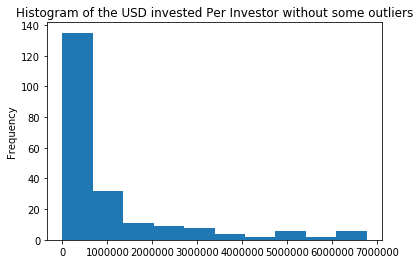

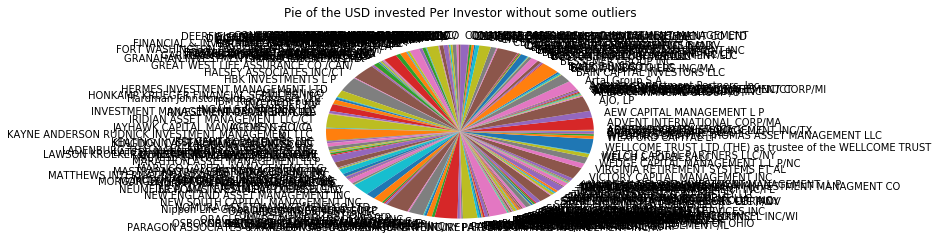

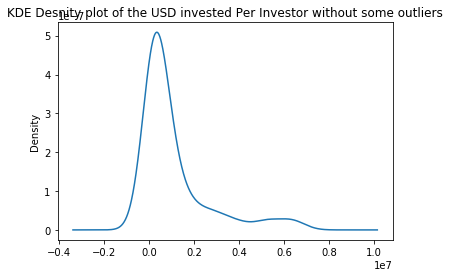

In [8]:
grouped_data_no_outliers = remove_outlier(gouped_data)
grouped_data_no_outliers['usd'].plot.box()
plt.title('Boxplot of the USD invested Per Investor without some outliers')
plt.show()
grouped_data_no_outliers['usd'].plot.hist()
plt.title('Histogram of the USD invested Per Investor without some outliers')
plt.show()
grouped_data_no_outliers['usd'].plot.pie()
plt.title('Pie of the USD invested Per Investor without some outliers')
plt.show()
grouped_data_no_outliers['usd'].plot.kde()
plt.title('KDE Desnity plot of the USD invested Per Investor without some outliers')
plt.show()

***COMMENTS*** : 
A éCRIRE


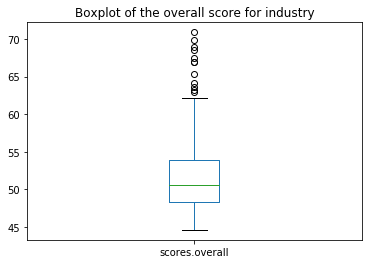

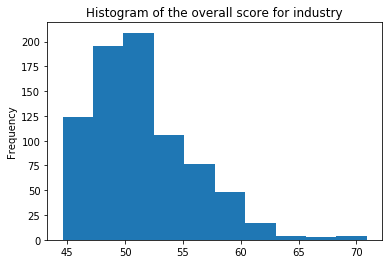

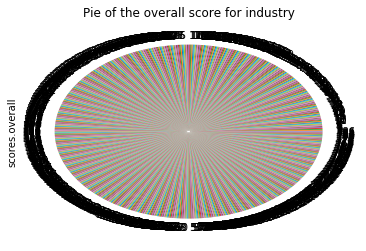

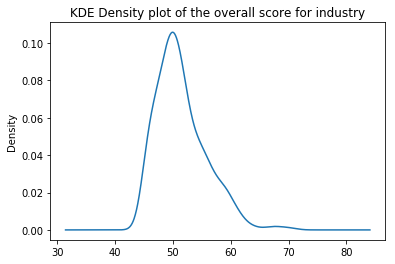

In [9]:
jc_companies_df = pd.read_csv("jc_companies.csv")
jc_companies_df['scores.overall'].plot.box()
plt.title('Boxplot of the overall score for industry')
plt.show()
jc_companies_df['scores.overall'].plot.hist()
plt.title('Histogram of the overall score for industry')
plt.show()
jc_companies_df['scores.overall'].plot.pie()
plt.title('Pie of the overall score for industry')
plt.show()
jc_companies_df['scores.overall'].plot.kde()
plt.title('KDE Density plot of the overall score for industry')
plt.show()

***COMMENTS*** : 
A éCRIRE


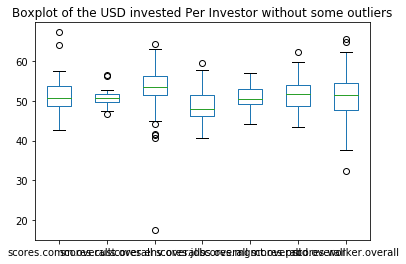

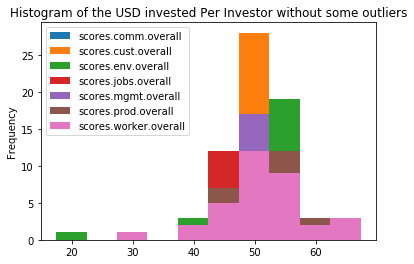

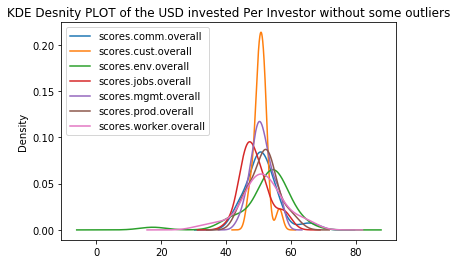

In [10]:
jc_industries_df_keep = pd.read_csv("jc_industries.csv")
jc_industries_df_keep = jc_industries_df_keep[['scores.comm.overall','scores.cust.overall','scores.env.overall','scores.jobs.overall','scores.mgmt.overall','scores.prod.overall','scores.worker.overall']]
jc_industries_df_keep.plot.box()
plt.title('Boxplot of the USD invested Per Investor without some outliers')
plt.show()
jc_industries_df_keep.plot.hist()
plt.title('Histogram of the USD invested Per Investor without some outliers')
plt.show()
jc_industries_df_keep.plot.kde()
plt.title('KDE Desnity PLOT of the USD invested Per Investor without some outliers')
plt.show()

***COMMENTS*** : 
A éCRIRE


In [11]:
## load Just Capital company scoring and rankings of ~800 largest public (investable) companies 
jc_companies_df = pd.read_csv("jc_companies.csv")
jc_industries_df = pd.read_csv("jc_industries.csv")


## load investment data
sec13f_sample_df = pd.read_csv("test_results.csv")

In [12]:
## rename investment scoring dataframe ticker attribute to make joining data with 13F data easier
jc_companies_df = jc_companies_df.rename(index=str, columns={"ticker": "symbol"})

## show sample of investement scoring data by company
jc_companies_df.head(10)

,symbol,name,industry,rank.overall,rank.industry,scores.overall,scores.comm.overall,scores.cust.overall,scores.env.overall,scores.jobs.overall,scores.mgmt.overall,scores.prod.overall,scores.worker.overall,scores.comm.abuse,scores.comm.charity,scores.comm.conflict,scores.comm.local,scores.comm.oppress,scores.comm.rels,scores.cust.disc,scores.cust.exp,scores.cust.fair,scores.cust.label,scores.cust.priv,scores.cust.truth,scores.env.efficient,scores.env.mgmt,scores.env.pollution,scores.jobs.growth,scores.jobs.size,scores.mgmt.integrity,scores.mgmt.laws,scores.mgmt.profit,scores.mgmt.reporting,scores.mgmt.return,scores.mgmt.tax,scores.prod.ben,scores.prod.price,scores.prod.qual,scores.worker.balance,scores.worker.career,scores.worker.ceo,scores.worker.fairpay,scores.worker.health,scores.worker.hiredisc,scores.worker.layoff,scores.worker.living,scores.worker.open,scores.worker.paydisc,scores.worker.pto,scores.worker.retire,scores.worker.safe
0,INTC,Intel,Semiconductors & Equipment,1.0,1,70.904113,100.468263,50.473130,85.126831,50.086377,56.353348,71.173570,78.221504,125.000000,106.862498,103.477752,111.775665,51.483665,108.300874,51.611377,34.977705,51.695187,51.700615,55.294927,51.513154,108.697215,95.739560,57.430156,43.035516,61.306350,66.043496,55.629631,62.350330,55.630968,43.667039,49.680345,110.988697,37.667396,56.261842,95.304766,84.273845,56.691195,68.722960,71.838230,88.416387,51.44779,71.823897,104.789042,125.000000,73.800808,33.752226,68.822486
1,TXN,Texas Instruments,Semiconductors & Equipment,2.0,2,69.868211,88.732140,53.975892,83.400488,44.226045,59.711520,75.170806,76.107459,112.801534,83.516161,59.306705,111.775665,51.483665,108.300874,51.611377,63.628725,51.695187,51.700615,55.294927,51.513154,105.289321,95.739560,55.798907,43.036840,46.118416,72.741572,56.956806,69.183683,55.630968,84.971847,43.833583,110.988697,53.486611,56.261842,101.617386,88.467460,60.756681,95.056324,81.827098,88.416387,51.44779,71.823897,72.008878,42.687032,86.067626,73.834172,74.731938
2,NVDA,NVIDIA,Semiconductors & Equipment,3.0,3,68.909677,85.760550,50.473130,74.869222,50.218429,59.848775,60.247317,89.527007,125.000000,80.917953,103.477752,39.894218,51.483665,90.503656,51.611377,34.977705,51.695187,51.700615,55.294927,51.513154,100.788146,66.033650,59.942706,54.460025,43.468813,63.128168,56.956806,59.095404,55.630968,93.709873,55.187048,110.988697,53.486611,17.897000,100.019254,106.127238,73.065710,93.004039,102.659145,88.416387,51.44779,71.823897,86.560256,125.000000,104.490031,70.526504,74.160056
3,MSFT,Microsoft,Software,4.0,1,68.554280,93.073672,51.968008,80.426427,55.615562,79.083299,43.327649,84.930136,125.000000,125.000000,59.742341,111.775665,48.206594,99.402265,51.611377,-19.158813,51.695187,51.700615,88.988692,51.513154,109.790107,75.485530,59.677166,48.213119,67.395005,125.000000,56.956806,73.131542,55.630968,64.311044,89.113393,84.594166,53.486611,-1.285421,99.260142,92.754267,44.465579,78.790892,82.287111,88.416387,51.44779,71.823897,113.516149,125.000000,98.760575,79.500134,77.666267
4,IBM,International Business Machines,Computer Services,5.0,1,67.418101,77.858573,55.882062,84.478543,67.168259,54.116198,65.712882,67.066750,125.000000,51.207389,92.996487,39.894218,51.483665,63.807829,51.611377,34.977705,51.695187,51.700615,77.757437,51.513154,104.846660,95.739560,58.961791,49.616370,95.098426,72.584863,56.956806,77.360733,55.630968,50.429501,23.679381,84.594166,53.486611,56.261842,85.795882,66.008323,42.942649,51.233897,39.374409,53.945788,51.44779,71.823897,87.513847,108.503747,78.403359,81.994395,71.491271
5,ACN,Accenture,Commercial Support Services,6.0,1,66.956795,70.018496,59.209687,88.664769,49.996700,54.278550,59.407599,75.706891,110.246719,92.119876,56.856540,39.894218,51.483665,54.909221,51.611377,62.196174,51.695187,51.700615,77.757437,51.513154,116.634828,95.739560,59.977908,44.123632,59.342460,107.319214,56.956806,76.455956,55.630968,80.808160,-17.305446,66.997813,53.486611,56.261842,84.797050,94.245330,52.376648,5

In [13]:
# show sample of invesement scoring data (by industry)
## this dataset is unused
jc_industries_df.head(10)

,name,scores.comm.overall,scores.cust.overall,scores.env.overall,scores.jobs.overall,scores.mgmt.overall,scores.prod.overall,scores.worker.overall,scores.comm.abuse,scores.comm.charity,scores.comm.conflict,scores.comm.local,scores.comm.oppress,scores.comm.rels,scores.cust.disc,scores.cust.exp,scores.cust.fair,scores.cust.label,scores.cust.priv,scores.cust.truth,scores.env.efficient,scores.env.mgmt,scores.env.pollution,scores.jobs.growth,scores.jobs.size,scores.mgmt.integrity,scores.mgmt.laws,scores.mgmt.profit,scores.mgmt.reporting,scores.mgmt.return,scores.mgmt.tax,scores.prod.ben,scores.prod.price,scores.prod.qual,scores.worker.balance,scores.worker.career,scores.worker.ceo,scores.worker.fairpay,scores.worker.health,scores.worker.hiredisc,scores.worker.layoff,scores.worker.living,scores.worker.open,scores.worker.paydisc,scores.worker.pto,scores.worker.retire,scores.worker.safe,total
0,JUST 100,67.354312,52.392449,64.404017,50.335392,53.797207,59.793143,65.540815,83.418517,69.789017,61.752652,66.490354,50.054689,68.113178,51.312686,44.747240,51.625812,51.198869,59.381138,50.660988,74.024316,67.891750,53.738665,49.122599,52.265297,55.957864,53.859895,57.576667,53.169154,58.421008,49.538041,77.782519,49.828638,49.694498,78.673524,72.820551,54.683005,62.359886,68.190295,60.554687,51.447790,64.078702,75.449175,73.625937,68.132231,64.745864,63.284207,100
1,Aerospace & Defense,48.974755,49.200088,55.856524,47.840855,55.437564,49.134008,54.672038,47.960242,48.610681,54.487195,43.887632,47.417962,52.210824,51.611377,49.144043,51.695187,51.700615,42.815754,51.513154,51.133573,58.692583,57.647907,43.039781,55.480761,57.988229,55.163918,60.093216,48.085721,68.906835,54.382027,46.698422,53.486611,48.550225,54.243621,51.235005,53.776615,56.892966,48.868473,52.011893,51.447790,67.852262,42.762754,46.343516,52.663473,56.597505,60.627311,18
2,Automobiles & Parts,54.379757,50.388621,56.889853,49.099062,51.043288,44.757255,47.630705,63.574431,38.470643,66.730935,44.686315,51.259600,46.771786,51.611377,51.983520,51.695187,51.700615,46.309923,51.513154,58.189862,57.105663,55.642119,47.950694,50.926449,52.617778,53.356575,53.042652,55.630968,46.755134,42.979667,48.918051,53.110181,35.498449,38.785211,41.331566,32.455098,53.278056,47.410566,51.494653,51.447790,41.107298,51.372776,51.462594,39.635664,51.054280,55.483747,15
3,Banks,48.394606,47.411630,53.843374,47.747139,47.192844,52.320067,47.274469,38.984897,46.478586,50.772102,51.874459,51.483665,56.006250,45.078703,45.905929,42.615910,51.700615,48.827478,51.513154,52.718433,46.431985,60.394595,45.959437,50.591893,48.271742,33.205282,57.579851,53.003183,46.349754,55.445906,50.113692,49.380812,56.261842,53.649794,49.872229,53.420035,43.490666,44.572732,49.533469,49.627605,43.064446,46.187573,44.254096,59.577622,47.258647,46.863366,42
4,Basic Resources,52.125193,49.569545,40.660251,47.427788,52.582246,53.102316,53.511922,56.802360,65.412565,28.183765,62.011587,51.483665,53.195905,51.611377,54.813026,51.695187,51.700615,41.471844,51.513154,40.878542,56.511796,28.473159,48.445743,45.807925,63.901416,55.779692,27.121621,55.630968,27.696275,50.719348,49.401459,53.486611,56.261842,35.780180,49.835514,60.038112,63.659072,50.715936,61.240463,51.447790,66.620219,61.653224,47.749856,36.849079,56.101835,37.473591,13
5,Building Materials & Packaging,50.776748,50.734955,48.906453,46.296371,51.789458,53.541381,47.363324,50.329827,48.445754,52.381584,47.595802,51.483665,53.002376,51.611377,62.400824,51.695187,51.700615,42.459207,51.513154,48.745177,52.567016,46.268675,46.944998,45.264217,50.090560,53.546210,59.449242,45.021097,50.490473,54.656975,52.857885,53.486611,54.206583,37.887973,46.255817,57.864418,50.754195,41.319123,51.460153,51.447790,60.469616,38.329543,42.687032,41.470838,39.416242,41.402433,28
6,Capital Markets,45.429952,50.480240,54.520921,45.898134,49.146570,55.263013,53.368104,35.055876,47.149485,50.772102,47.082363,50.910047,48.447995,51.611377,46.833902,51.695187,51.700615,49.304924,51.513154,5

In [14]:
## how many unique investors does the 13F investment manager sample dataset include?
sec13f_sample_count_df = sec13f_sample_df.drop_duplicates(subset=['investor'], keep='first')
sec13f_sample_count_df.count()

Unnamed: 0    239
investor      239
date          239
stock         239
cusip         239
usd           239
putcall         7
pcent         236
dtype: int64

In [20]:
# create mapping from cusip to symbol to allow Just Capital and 13F sample data to be joined
## load CUSIP to ticker data from "fail to deliver" data - we load several monthes of data to capture a greater number of unique investment managers
## note: "fail to deliver" data records the volume of transactions that a investment manager fails to deliver on
filelist = ['cnsfails201807a.txt', 'cnsfails201807b.txt', 'cnsfails201808a.txt', 'cnsfails201808b.txt', 'cnsfails201809a.txt' , 'cnsfails201809b.txt', 'cnsfails201810a.txt', 'cnsfails201810b.txt']
cusip_to_ticker_df_raw_data = pd.concat([pd.read_csv(item, sep='|', index_col=False, encoding='latin-1' ) for item in filelist], axis=0)
### drop duplicate entries for invesment managers
cusip_to_ticker_df = cusip_to_ticker_df_raw_data.drop_duplicates(subset=['CUSIP'], keep='first')
## drop unnessasary attributes from dataframe
cusip_to_ticker_df = cusip_to_ticker_df.drop(['SETTLEMENT DATE', 'DESCRIPTION'], axis=1)
## rename to make joining with 13F sample dataset easier
cusip_to_ticker_df = cusip_to_ticker_df.rename(index=str, columns={"CUSIP": "cusip", "SYMBOL": "symbol"})

print ("Count of unique cusip to stock symbol mappings captured:" , cusip_to_ticker_df.count().cusip)


# show sample of cusip to stock symbol mappings
cusip_to_ticker_df.head()

Count of unique cusip to stock symbol mappings captured: 13065


,cusip,symbol,QUANTITY (FAILS),PRICE
0,B38564108,EURN,1157.0,9.20
1,D1668R123,DDAIF,20666.0,64.20
2,D18190898,DB,168922.0,10.62
3,G0084W101,ADNT,467.0,49.19
4,G0132V105,AGMH,461.0,23.90


In [21]:
import numpy as np
cusip_to_ticker_df['PRICE']=cusip_to_ticker_df['PRICE'].replace('.', np.nan)
cusip_to_ticker_df['PRICE']=cusip_to_ticker_df['PRICE'].astype(float)

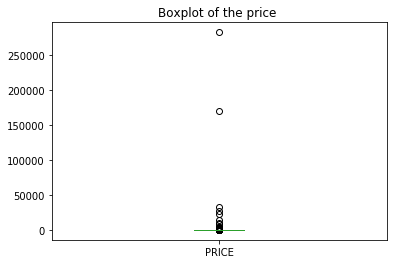

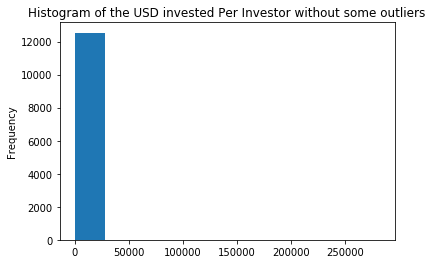

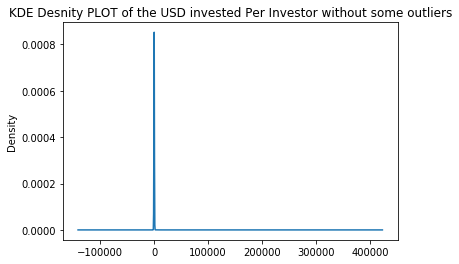

In [22]:
cusip_to_ticker_df['PRICE'].plot.box()
plt.title('Boxplot of the price per unique cusip ')
plt.show()
cusip_to_ticker_df['PRICE'].plot.hist()
plt.title('Histogram of the price per unique cusip ')
plt.show()
cusip_to_ticker_df['PRICE'].plot.kde()
plt.title('KDE Desnity plot of the price per unique cusip ')
plt.show()

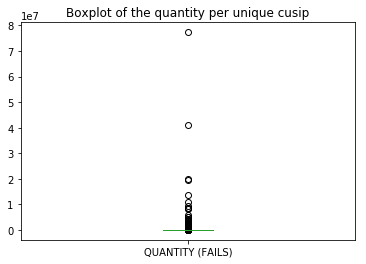

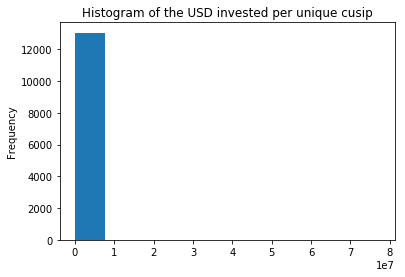

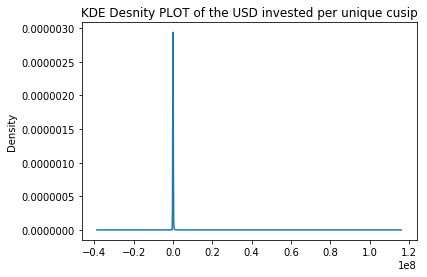

In [24]:
cusip_to_ticker_df['QUANTITY (FAILS)'].plot.box()
plt.title('Boxplot of the quantity per unique cusip')
plt.show()
cusip_to_ticker_df['QUANTITY (FAILS)'].plot.hist()
plt.title('Histogram of the USD invested per unique cusip')
plt.show()
cusip_to_ticker_df['QUANTITY (FAILS)'].plot.kde()
plt.title('KDE Desnity PLOT of the USD invested per unique cusip')
plt.show()

In [27]:
# for every investment manager asset holding entry in sec13f_sample_df, 
# if the "stock" matches a company scored by the Just Capital dataset, merge the datasets together
## do left outer join
merged_df = pd.merge(sec13f_sample_df, cusip_to_ticker_df, how="inner", on="cusip")
merged_df = pd.merge(merged_df, jc_companies_df, how="inner", on = 'symbol')
## create weighted_score attribute
merged_df["weighted_score"] = merged_df['pcent']/100*merged_df['scores.overall']

# show merged dataset
merged_df.head(10)


,Unnamed: 0,investor,date,stock,cusip,usd,putcall,pcent,symbol,QUANTITY (FAILS),PRICE,name,industry,rank.overall,rank.industry,scores.overall,scores.comm.overall,scores.cust.overall,scores.env.overall,scores.jobs.overall,scores.mgmt.overall,scores.prod.overall,scores.worker.overall,scores.comm.abuse,scores.comm.charity,scores.comm.conflict,scores.comm.local,scores.comm.oppress,scores.comm.rels,scores.cust.disc,scores.cust.exp,scores.cust.fair,scores.cust.label,scores.cust.priv,scores.cust.truth,scores.env.efficient,scores.env.mgmt,scores.env.pollution,scores.jobs.growth,scores.jobs.size,scores.mgmt.integrity,scores.mgmt.laws,scores.mgmt.profit,scores.mgmt.reporting,scores.mgmt.return,scores.mgmt.tax,scores.prod.ben,scores.prod.price,scores.prod.qual,scores.worker.balance,scores.worker.career,scores.worker.ceo,scores.worker.fairpay,scores.worker.health,scores.worker.hiredisc,scores.worker.layoff,scores.worker.living,scores.worker.open,scores.worker.paydisc,scores.worker.pto,scores.worker.retire,scores.worker.safe,weighted_score
0,18,"KINGDON CAPITAL MANAGEMENT, L.L.C.",2018-08-14,CATERPILLAR INC DEL,149123101,47485.0,Call,3.31,CAT,179.0,135.67,Caterpillar,Commercial Vehicles & Machinery,38.0,2,59.831901,67.430769,50.473130,74.014945,46.121090,55.722024,66.814975,57.604461,95.986075,53.491565,93.745148,39.894218,44.228308,54.909221,51.611377,34.977705,51.695187,51.700615,55.294927,51.513154,105.355625,64.682481,54.942650,39.426035,56.774874,74.903285,54.926841,53.439428,55.630968,39.027498,43.407348,87.669811,53.486611,56.261842,67.283861,65.216196,45.966208,88.577952,49.034696,53.945788,51.44779,49.507095,41.486383,42.687032,51.831430,71.697565,64.434461,1.980436
1,57,WILBANKS SMITH & THOMAS ASSET MANAGEMENT LLC,2018-08-08,Caterpillar,149123101,12284.0,NaN,0.98,CAT,179.0,135.67,Caterpillar,Commercial Vehicles & Machinery,38.0,2,59.831901,67.430769,50.473130,74.014945,46.121090,55.722024,66.814975,57.604461,95.986075,53.491565,93.745148,39.894218,44.228308,54.909221,51.611377,34.977705,51.695187,51.700615,55.294927,51.513154,105.355625,64.682481,54.942650,39.426035,56.774874,74.903285,54.926841,53.439428,55.630968,39.027498,43.407348,87.669811,53.486611,56.261842,67.283861,65.216196,45.966208,88.577952,49.034696,53.945788,51.44779,49.507095,41.486383,42.687032,51.831430,71.697565,64.434461,0.586353
2,78,SADOFF INVESTMENT MANAGEMENT LLC,2018-08-03,CATERPILLAR INC DEL,149123101,40627.0,NaN,3.51,CAT,179.0,135.67,Caterpillar,Commercial Vehicles & Machinery,38.0,2,59.831901,67.430769,50.473130,74.014945,46.121090,55.722024,66.814975,57.604461,95.986075,53.491565,93.745148,39.894218,44.228308,54.909221,51.611377,34.977705,51.695187,51.700615,55.294927,51.513154,105.355625,64.682481,54.942650,39.426035,56.774874,74.903285,54.926841,53.439428,55.630968,39.027498,43.407348,87.669811,53.486611,56.261842,67.283861,65.216196,45.966208,88.577952,49.034696,53.945788,51.44779,49.507095,41.486383,42.687032,51.831430,71.697565,64.434461,2.100100
3,392,UNITED SERVICES AUTOMOBILE ASSOCIATION,2018-08-10,Cisco Systems Inc,149123101,308124.0,NaN,0.82,CAT,179.0,135.67,Caterpillar,Commercial Vehicles & Machinery,38.0,2,59.831901,67.430769,50.473130,74.014945,46.121090,55.722024,66.814975,57.604461,95.986075,53.491565,93.745148,39.894218,44.228308,54.909221,51.611377,34.977705,51.695187,51.700615,55.294927,51.513154,105.355625,64.682481,54.942650,39.426035,56.774874,74.903285,54.926841,53.439428,55.630968,39.027498,43.407348,87.669811,53.486611,56.261842,67.283861,65.216196,45.966208,88.577952,49.034696,53.945788,51.44779,49.507095,41.486383,42.687032,51.831430,71.697565,64.434461,0.490622
4,90,CHARTER TRUST CO,2018-08-10,CATERPILLAR INC,149123101,11796.0,NaN,1.42,CAT,179.0,135.67,Caterpillar,Commercial Vehicles & Machinery,38.0,2,59.831901,67.430769,50.473130,74.014945,46.121090,55.722024,66.814975,57.604461,95.986075,53.491565,93.745148,39.894218,44.228308,54.909221,51.611377,34.977705,51.695187,51.700615,55.294927,51.513154,105.355625,64.682481,54.94

In [28]:
# group merged dataset by investor, and sum the investment weighted_score entries by investor
investor_score_df = merged_df.groupby(['investor'])['weighted_score'].sum().reset_index()
investor_score_df = investor_score_df.sort_values('weighted_score', ascending=False)

# show investor score data
investor_score_df

,investor,weighted_score
153,POLEN CAPITAL MANAGEMENT LLC,51.895091
115,MASTRAPASQUA ASSET MANAGEMENT INC,50.177212
127,NEW ENGLAND ASSET MANAGEMENT INC,50.086075
33,CALEDONIA INVESTMENTS PLC,46.766679
118,MCDONALD CAPITAL INVESTORS INC/CA,43.774288
214,WELLCOME TRUST LTD (THE) as trustee of the WEL...,43.174845
106,"LATEEF INVESTMENT MANAGEMENT, L.P.",42.489008
113,MARSICO CAPITAL MANAGEMENT LLC,42.399781
45,COMPASS CAPITAL MANAGEMENT INC/,39.661189
170,SALEM CAPITAL MANAGEMENT INC,39.092250


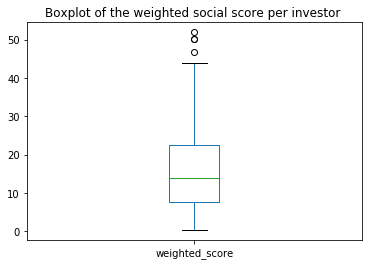

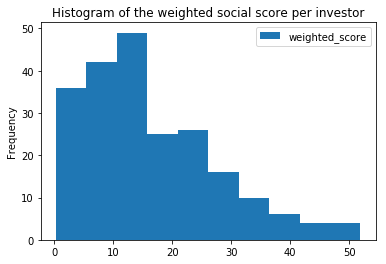

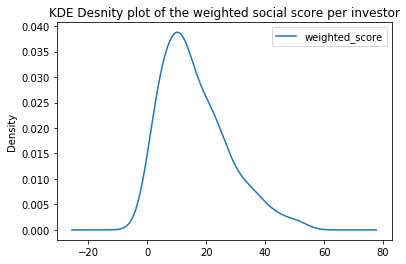

In [39]:
investor_score_df.plot.box()
plt.title('Boxplot of the weighted social score per investor ')
plt.show()
investor_score_df.plot.hist()
plt.title('Histogram of the weighted social score per investor')
plt.show()
investor_score_df.plot.kde()
plt.title('KDE Desnity plot of the weighted social score per investor')
plt.show()

In [39]:
print ("Number of investment managers included in investor ranking produced:" , investor_score_df.count().investor)


print ("This represents the following percentage of investment managers from our sample 13F dataset:" , investor_score_df.count().investor/sec13f_sample_count_df.count().investor)


Number of investment managers included in investor ranking produced: 218
This represents the following percentage of investment managers from our sample 13F dataset: 0.9121338912133892


### Followup Questions:
#### Who are the missing investors, and why?
#### Why does the ROYAL BANK OF CANADA have the lowest score, and why does POLEN CAPITAL MANAGEMENT have the highest score?

#### Should the data be cleaned in some way, experiencing biases? (for example, we should be excluding certain types of investments/investors)
